<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/S_09/random_forest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing the dataset

In [18]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/S_06/Position_Salaries.csv'
dataset = pd.read_csv(fp)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(dataset.iloc[:, 1:-1])

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


## Training the Random Forest Regression model on the whole dataset

In [3]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [4]:
regressor.predict([[6.5]])

array([167000.])

## Visualising the Random Forest Regression results (higher resolution)

/tmp/ipython-input-230117209.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


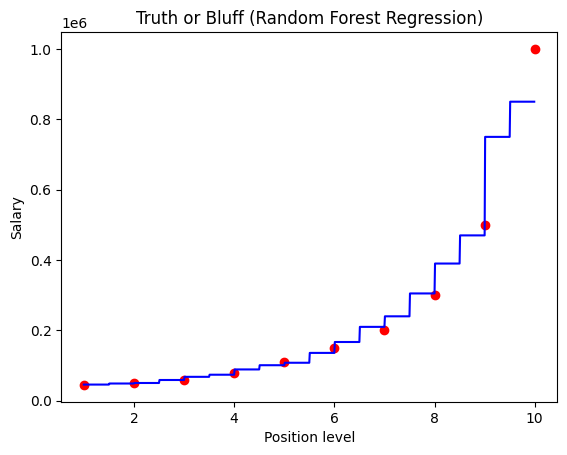

In [5]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Post hoc

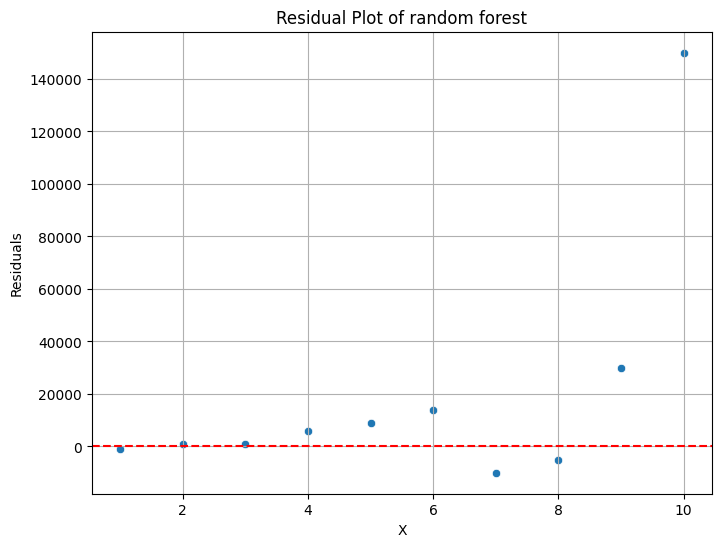

In [20]:
# calc residuals
y_pred = regressor.predict(X)
y_test = y



residuals = y_test - y_pred

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.flatten(), y=residuals.flatten())
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot of random forest")
plt.grid(True)
plt.show()



## Evaluating the Model Performance

In [7]:
# calc r squared (r2): coefficient of determination
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9704434230386582

In [7]:
from sns